In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib
plt.rcParams['figure.figsize'] = (10,5)
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth',150)
import sys,os
import json
import numpy as np

In [3]:
sample_data = pd.Series(np.random.random(100)*23)

In [4]:
sample_data.head(20)

0     11.931444
1      5.454561
2      2.943436
3     14.730730
4     11.501435
5      3.938061
6      1.142820
7     20.805370
8     22.684728
9      0.289842
10    13.148287
11    14.402709
12    15.379883
13    18.884677
14    10.511611
15    21.583546
16    17.703818
17    14.204912
18    20.884231
19    16.505020
dtype: float64

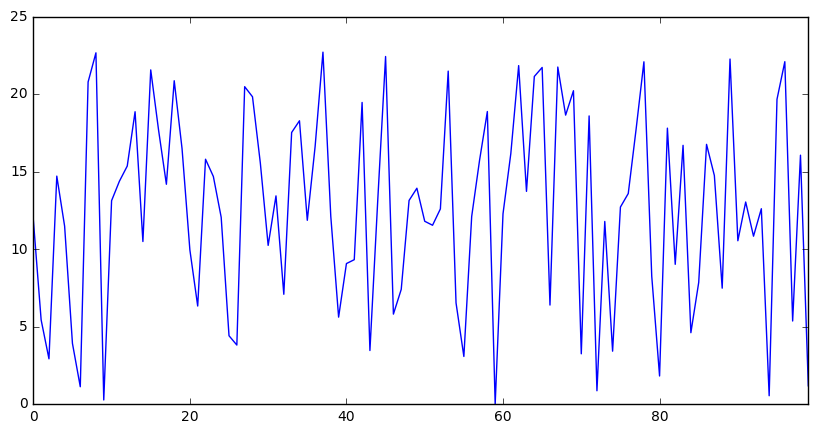

In [5]:
sample_data.plot()

In [6]:
sample_data.iloc[99]=19

In [7]:
sample_data.sum()/100

12.844988306250265

In [8]:
sample_data.describe()

count    100.000000
mean      12.844988
std        6.361374
min        0.024234
25%        7.778831
50%       13.154186
75%       17.944461
max       22.728339
dtype: float64

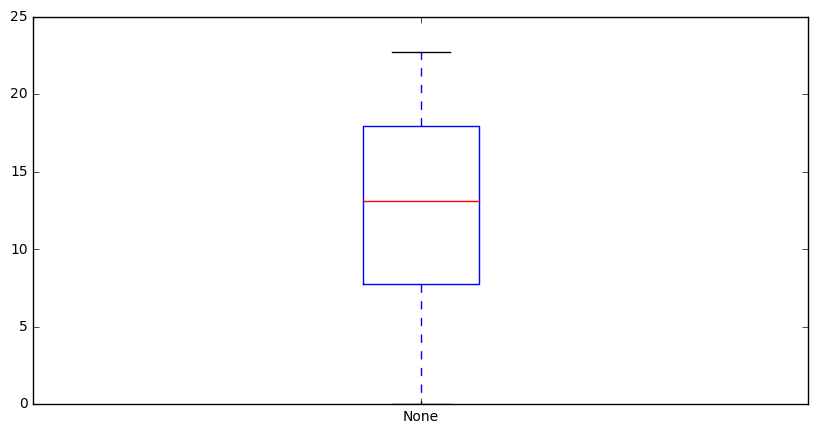

In [9]:
sample_data.plot.box()

In [10]:
sample_data.value_counts()

10.561358    1
7.502299     1
11.805329    1
16.080816    1
4.628492     1
17.545570    1
5.382983     1
12.128704    1
3.436422     1
6.411911     1
18.897669    1
17.747078    1
13.060672    1
22.283861    1
8.274166     1
3.479931     1
19.000000    1
9.340033     1
17.825373    1
5.632720     1
20.500914    1
10.854676    1
18.666942    1
14.708173    1
16.716624    1
13.747161    1
21.767871    1
22.684728    1
1.142820     1
2.943436     1
            ..
13.171586    1
14.402709    1
18.614196    1
15.578939    1
13.160085    1
10.262313    1
21.740903    1
18.301725    1
21.860465    1
12.614621    1
11.880113    1
12.626930    1
13.949045    1
7.423880     1
15.736254    1
22.728339    1
14.769006    1
5.827911     1
0.883266     1
13.606830    1
15.379883    1
12.734695    1
16.646779    1
22.106086    1
16.192997    1
9.088927     1
3.831912     1
16.779610    1
20.239847    1
0.289842     1
dtype: int64

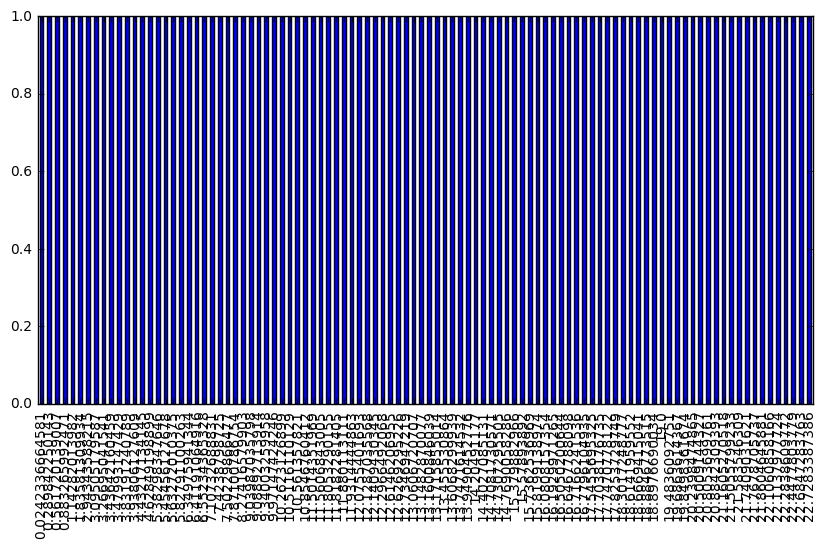

In [11]:
sample_data.value_counts().sort_index().plot.bar()

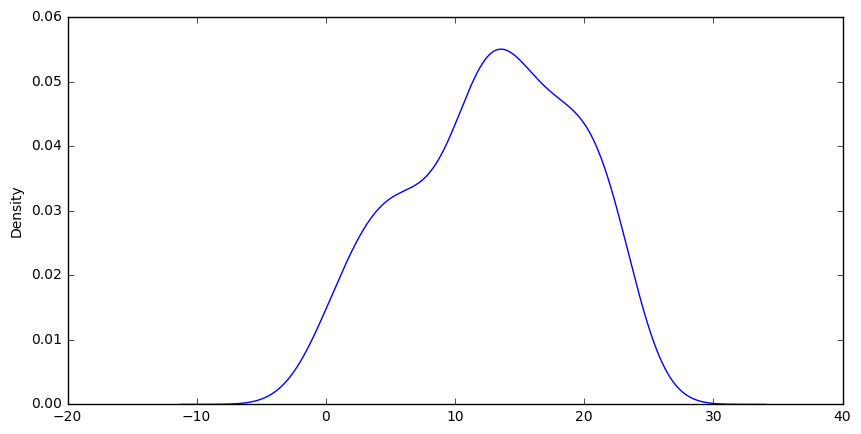

In [12]:
sample_data.plot(kind='kde')

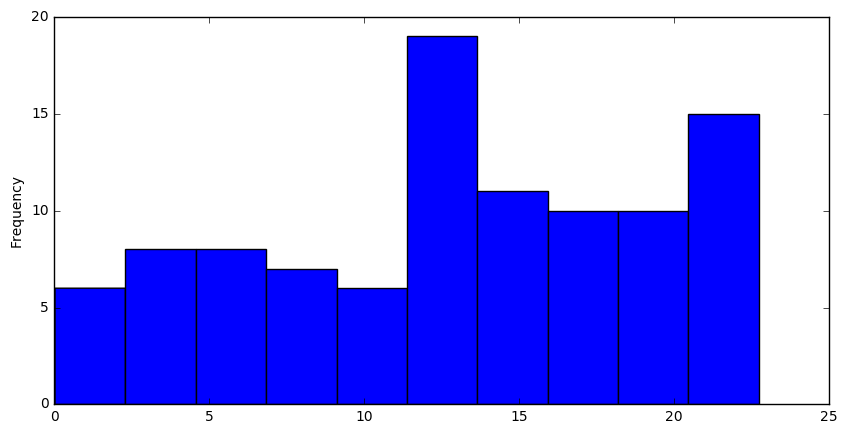

In [13]:
sample_data.plot.hist()

In [14]:
sc_data = pd.read_csv('spot_check_data.csv.bz2')

//anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,49,50,52,53,54,55,56,57,58,60,61,62,63,64,65,66,68,69,70,72,73,74,76,77,78,79,80,81,82,83,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
sc_data.columns

Index(['Unnamed: 0', 'id', 'job_id', 't_created', 't_info', 'tr_created',
       'tr_info', 'start_time', 'finish_time', 'additionalAttributes',
       'availability', 'brandName', 'brandText', 'breadCrumbs',
       'categoryNamePath', 'currency', 'description', 'imageUrl', 'listPrice',
       'mpns', 'productUrl', 'salePrice', 'seller', 'sku', 'storeId',
       'storeName', 'title', 'upcs', 'url', 'variantAttributes', 'WrongURL',
       'additionalAttributes_status', 'availability_status',
       'brandName_status', 'brandText_status', 'breadCrumbs_status',
       'categoryNamePath_status', 'comments', 'currency_status',
       'description_status', 'imageUrl_status', 'listPrice_status',
       'mpns_status', 'salePrice_status', 'sku_status', 'title_status',
       'upcs_status', 'variantAttributes_status', 'variantCOLOR_status',
       'variantColoe_status', 'variantColorCode_status', 'variantColor_status',
       'variantConditionTypeText_status', 'variantCondition_status',
       '

In [16]:
sc_data.breadCrumbs_status.value_counts()

Correct       4340
Notpresent    1245
Incorrect      747
Missed         291
Name: breadCrumbs_status, dtype: int64

In [17]:
sc_data.categoryNamePath_status.value_counts()

Correct      5021
Incorrect    1595
Missed          7
Name: categoryNamePath_status, dtype: int64

## Questions:

1.  How many words are present in title? Analyse the distribution of no of words in title
2.  How many words are present in breadcrumbs? Analyse the distribution of no of words in breadcrumbs
3. How many samples did we misclassify in total?
4. What is probability of misclassifying a sample?
5. How many samples are misclassified when the breadcrumbs are invalid
6. What is the probability that breadcrumbs are invalid
7. What is the probability of correct category given the breadcrumb is invalid
8. Which toplevel category contains most invalid breadcrumbs (edited)

http://pandas.pydata.org/pandas-docs/stable/10min.html

In [44]:
import re

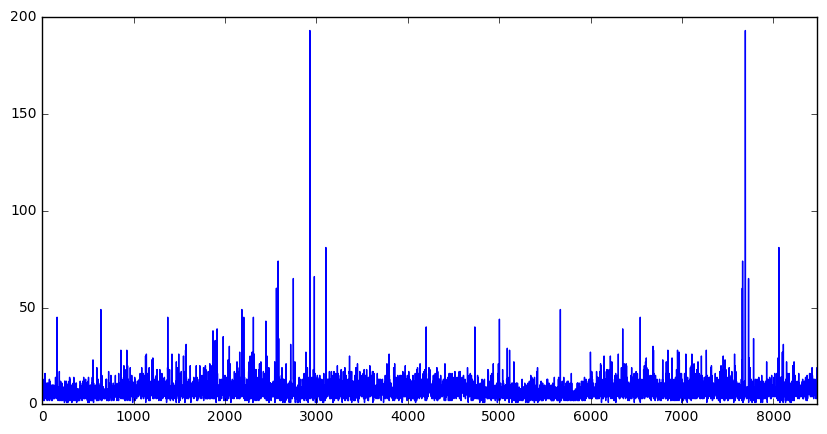

In [101]:
#How many words are present in title? Analyse the distribution of no of words in title

get_words = lambda x: len(re.sub("[^\w]", " ",  x).split())
    
title_words = sc_data.title.map(get_words)
title_words.plot()

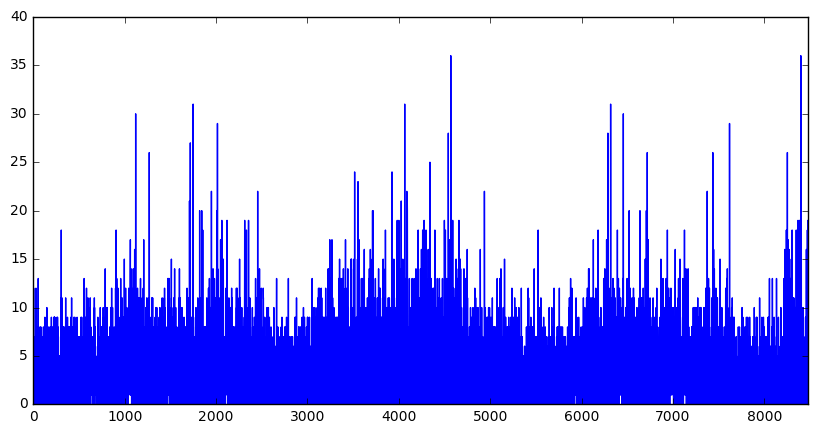

In [105]:
#How many words are present in breadcrumbs? Analyse the distribution of no of words in breadcrumbs.

get_x = lambda x: 0 if type(x) == float else get_words(x)

breadcrumb_words = sc_data.breadCrumbs.map(get_x)
breadcrumb_words.plot()

In [117]:
#How many samples did we misclassify in total?

def get_correct_classified(dataset):
    return dataset.categoryNamePath_status[dataset.categoryNamePath_status == "Correct"]

def get_num_incorrect_classified(dataset):
    correct_classified = get_correct_classified(dataset)
    incorrect_classified = len(dataset) - len(correct_classified)
    return incorrect_classified

get_num_incorrect_classified(sc_data)

3460

In [118]:
#What is probability of misclassifying a sample?

get_num_incorrect_classified(sc_data)/len(sc_data)

0.4079707581653107

In [119]:
#How many samples are misclassified when the breadcrumbs are invalid?

breadcrumbs_invalid = sc_data[sc_data.breadCrumbs.isnull()]

get_num_incorrect_classified(breadcrumbs_invalid)

1019

In [120]:
#What is the probability that breadcrumbs are invalid?

len(breadcrumbs_invalid) / len(sc_data)

0.24277797429548403

In [121]:
#What is the probability of correct category given the breadcrumb is invalid?

len(get_correct_classified(breadcrumbs_invalid))/len(breadcrumbs_invalid)

0.505099562894609

In [122]:
#Which toplevel category contains most invalid breadcrumbs (edited)?

get_top_category = lambda x: x.split(">", 1)[0]

list(breadcrumbs_invalid.categoryNamePath.map(get_top_category).value_counts().items())[0]

('Clothing & Accessories ', 493)